In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.datasets import make_blobs
mpl.rcParams['figure.dpi'] = 300

import time

In [2]:
from functools import wraps
import time


def timeit(func):
    @wraps(func)
    def timeit_wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        print(f'Function {func.__name__}{args} {kwargs} Took {total_time:.4f} seconds')
        return result
    return timeit_wrapper

In [3]:
rows_number = []
for i in range(14):
    rows_number.append(4*(2**i))
rows_number

[4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]

In [4]:
datasets = []
for i in rows_number:
    total_columns = i
    cols = []
    for column_number in range(1, total_columns + 1):
        cols.append('column' + str(column_number))
    arr = make_blobs(n_samples=1000, n_features=total_columns, random_state=20, centers=3, cluster_std=1)
    data = pd.DataFrame(data=arr[0], columns=cols)
    datasets.append(data)
# datasets

In [5]:
data_rows = []
time_spended = []
for data in datasets:
    start_time = time.perf_counter()
    data.corr()
    end_time = time.perf_counter()
    total_time = end_time - start_time
    time_spended.append(total_time)
    data_rows.append(data.shape[1])
display(data_rows)
display(time_spended)
columns = ['rows', 'time']
timedata = pd.DataFrame(data=zip(data_rows, time_spended), columns=columns)

[4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]

[0.003672299999990969,
 0.0007156019999996488,
 0.0005959679999989476,
 0.0014395540000009532,
 0.005166039000002343,
 0.019905887999996708,
 0.07946767800000032,
 0.32366076899999996,
 1.2361961909999906,
 4.943500592999996,
 19.78270692400001,
 79.284488778,
 316.63431826199997,
 1268.125787061]

In [6]:
columns = ['columns', 'time']
timedata = pd.DataFrame(data=zip(data_rows, time_spended), columns=columns)

In [7]:
timedata

,columns,time
0,4,0.003672
1,8,0.000716
2,16,0.000596
3,32,0.001440
4,64,0.005166
5,128,0.019906
6,256,0.079468
7,512,0.323661
8,1024,1.236196
9,2048,4.943501


In [8]:
import math
columns2 = ['x', 'x^2']
y_data = [x * math.log(x) for x in data_rows]
parabola = pd.DataFrame(data=zip(data_rows, y_data), columns=columns2)
parabola

,x,x^2
0,4,5.545177
1,8,16.635532
2,16,44.361420
3,32,110.903549
4,64,266.168517
5,128,621.059874
6,256,1419.565426
7,512,3194.022208
8,1024,7097.827129
9,2048,15615.219684


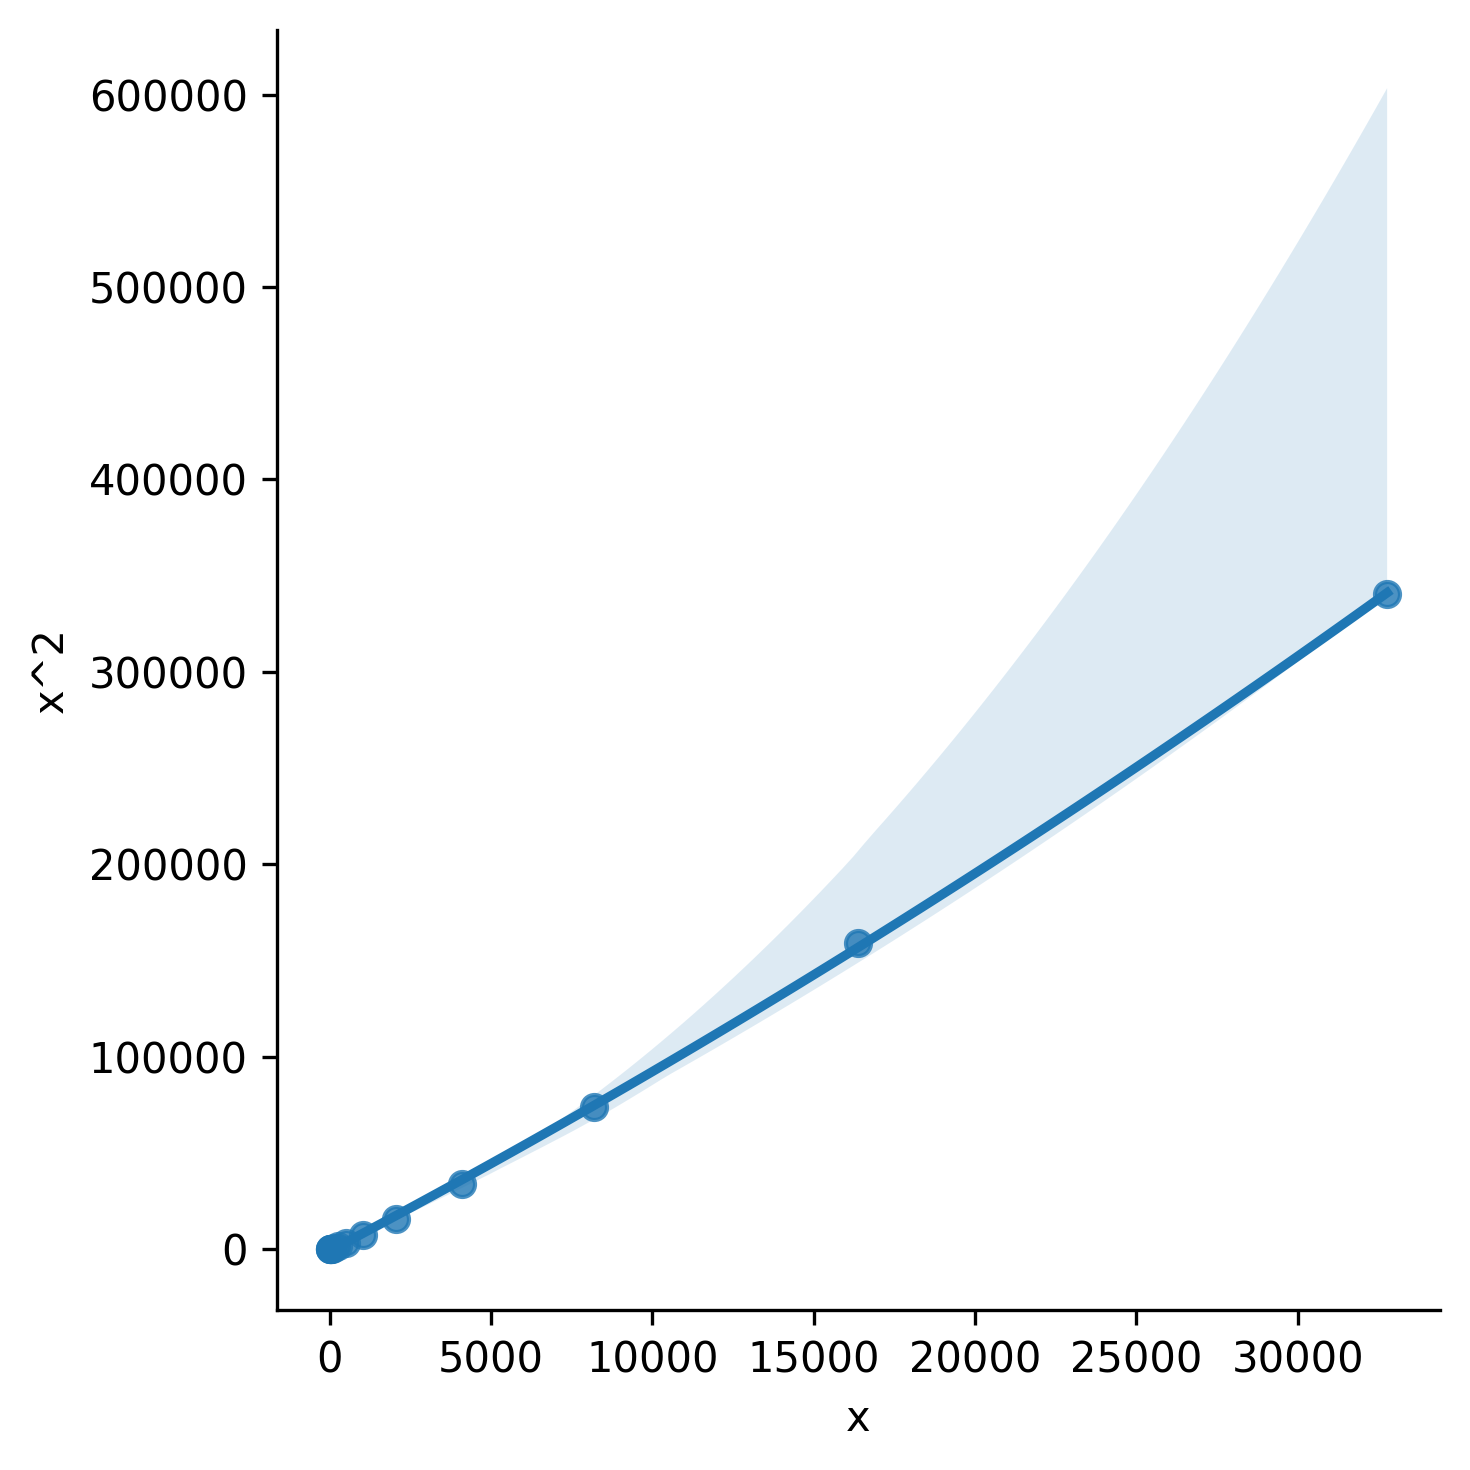

In [9]:
sns.lmplot(data=parabola, x='x', y='x^2', order=2)

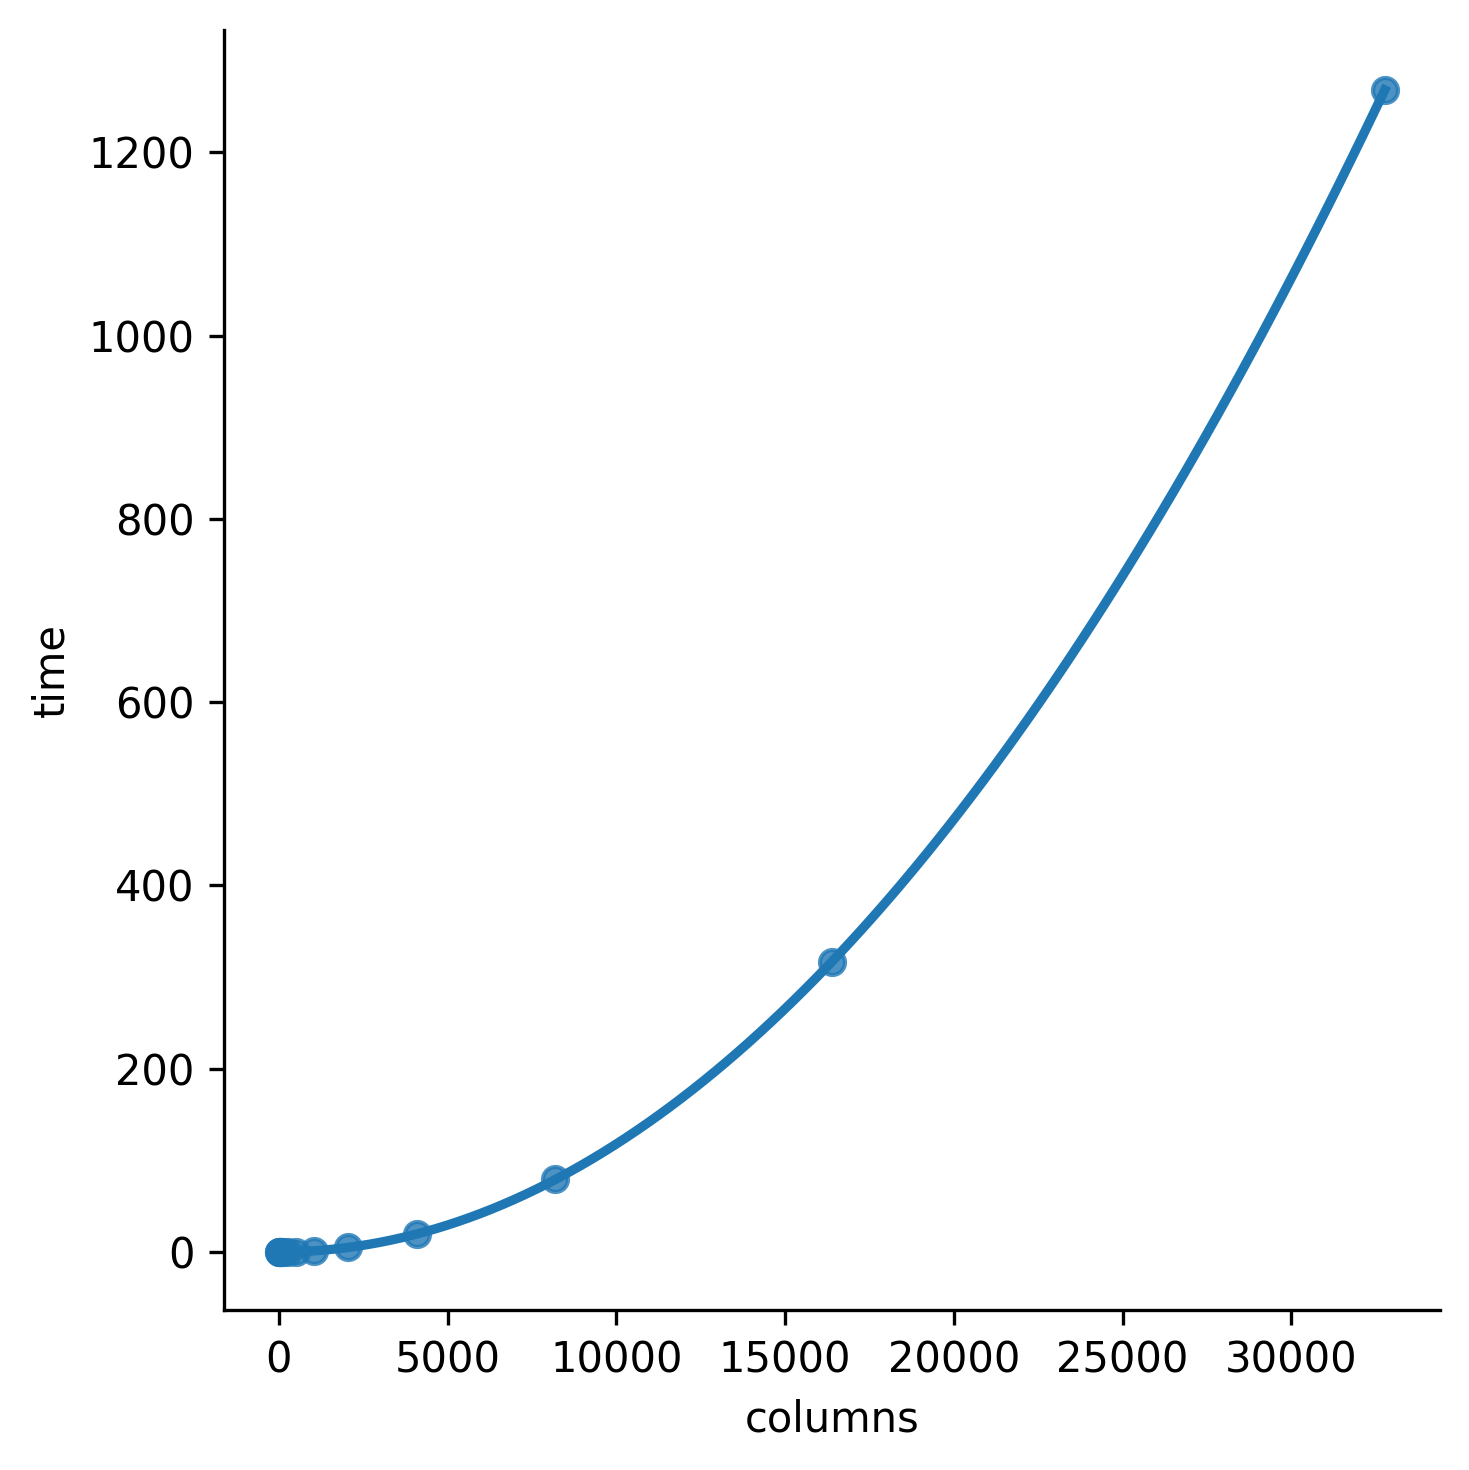

In [10]:
sns.lmplot(data=timedata, x='columns', y='time', order=2)
plt.show()

KeyError: "['rows'] not in index"

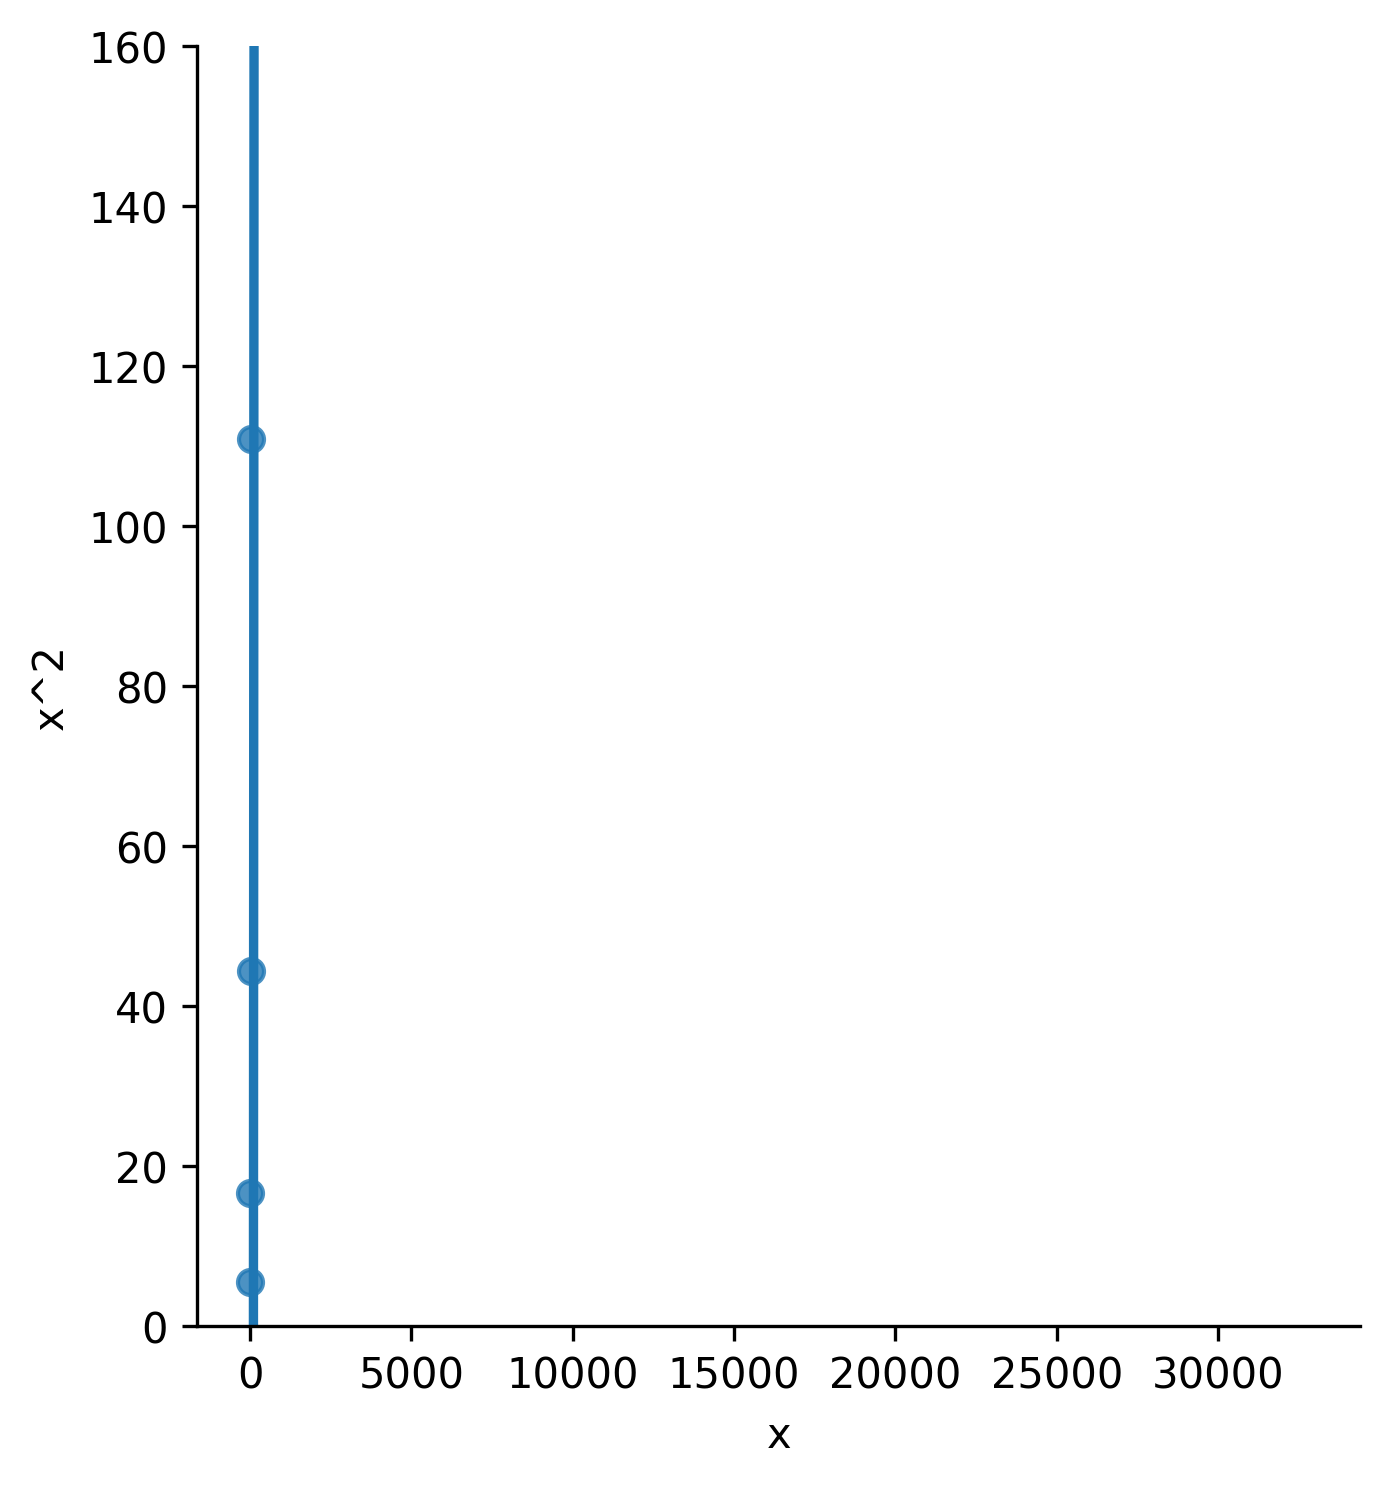

In [11]:
g = sns.lmplot(data=parabola, x='x', y='x^2', order=2)
g.set(ylim=(0, 160))
sns.lmplot(data=timedata, x='rows', y='time', order=2)